# BONUS

In [102]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.model_selection import cross_val_score

#### Ako radimo sa skroz preciscenim podacima bez dosta atributa pokreni ovo :

In [103]:
# Ucitavanje podataka

df_bonus = pd.read_csv('data/bonus/bonus.csv')
pd.set_option('display.max_columns', 100)
df_bonus = df_bonus.drop(columns = ['Cluster'])
df_bonus.head()

df_claster0 = pd.read_csv('data/bonus/cluster_0.csv')
df_claster0 = df_claster0.drop(columns = ['Cluster'])
df_claster0

df_claster1 = pd.read_csv('data/bonus/cluster_1.csv')
df_claster1 = df_claster1.drop(columns = ['Cluster'])
df_claster1.head()

,Unnamed: 0,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0.171429,0.571429,1.000000,0.0,0.333333,0.269680,0.192469,0.153741,0.512287,0
1,4,0.200000,1.000000,0.372333,0.4,0.479167,0.778644,0.556485,0.056463,0.000000,0
2,5,0.200000,1.000000,0.372333,0.0,0.479167,0.778644,0.556485,0.055329,0.000000,0
3,12,0.157143,0.714286,1.000000,0.0,0.333333,0.269680,0.192469,0.153741,0.512287,0
4,19,0.300000,0.714286,0.000000,0.4,0.333333,0.455183,0.669456,0.000907,0.170510,1


#### Ako radimo sa svim  podacima  pokreni ovo :

In [105]:
df_bonus = pd.read_csv('data/bonus/bonus_sve.csv')
pd.set_option('display.max_columns', 100)
df_bonus = df_bonus.drop(columns = ['Cluster'])
df_bonus.head()

df_claster0 = pd.read_csv('data/bonus/cluster_0_sve.csv')
df_claster0 = df_claster0.drop(columns = ['Cluster'])
df_claster0

df_claster1 = pd.read_csv('data/bonus/cluster_1_sve.csv')
df_claster1 = df_claster1.drop(columns = ['Cluster'])
df_claster1.head()

,Unnamed: 0,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,housing,loan,contact,month,day_of_week,duration,poutcome,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,0,0.171429,0.571429,1.000000,0.0,0.333333,0.269680,0.192469,0.153741,0.512287,0,1,0,0,5,4,487.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,4,0.200000,1.000000,0.372333,0.4,0.479167,0.778644,0.556485,0.056463,0.000000,0,0,0,0,9,3,128.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,5,0.200000,1.000000,0.372333,0.0,0.479167,0.778644,0.556485,0.055329,0.000000,0,1,0,0,9,0,290.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,12,0.157143,0.714286,1.000000,0.0,0.333333,0.269680,0.192469,0.153741,0.512287,0,0,0,0,5,4,553.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,19,0.300000,0.714286,0.000000,0.4,0.333333,0.455183,0.669456,0.000907,0.170510,0,0,0,0,3,0,222.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### U zavisnosti za sta se pravi predikativni model ucitati jednu od naredne tri celije

In [93]:
X = df_bonus.drop('y', axis=1)
y = df_bonus['y']

In [106]:
X = df_claster0.drop('y', axis=1)
y = df_claster0['y']

In [99]:
X = df_claster1.drop('y', axis=1)
y = df_claster1['y']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

### Pravimo model i fitujemo

In [108]:
def print_performance(y, y_hat):
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')

In [109]:
model = KNeighborsClassifier( n_neighbors=5)
model.fit(X_train, y_train)
predictions= model.predict(X_test)


probas = model.predict_proba(X_test)
pred_proba = probas[:, 1]
roc = round(roc_auc_score(y_test, pred_proba),4)

cfm = confusion_matrix(y_true=y_test, y_pred=predictions)

print(cfm)
print_performance(y_test, predictions)
print('AUC', roc)


results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
# Kros validiran accuracy, sa devijacijom
print('Cross validated accuracy je: ',results.mean())

print('Cross validated standarardna devijacija za accuracy je: ',results.std())


[[748  16]
 [ 23  17]]
Accuracy: 0.9514925373134329
Precision: 0.5151515151515151
Recall: 0.425
F1: 0.4657534246575342
AUC 0.8574
Cross validated accuracy je:  0.9190298507462685
Cross validated standarardna devijacija za accuracy je:  0.02342439718764104


#### ROC :

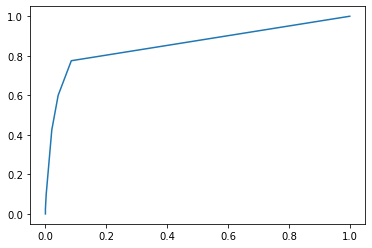

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
plt.plot(fpr, tpr)

### Uporedba  za skroz preciscene podatke

#### Pre klasterovanja

            [[1039    5]
             [ 129    0]]
            Accuracy: 0.8857630008525149
            Precision: 0.0
            Recall: 0.0
            F1: 0.0
            AUC 0.5618
            Cross validated accuracy je:  0.5433038232015215
            Cross validated standarardna devijacija za accuracy je:  0.18387206668183667
            
            
#### Klaster 0 
    
            [[764   0]
             [ 40   0]]
            Accuracy: 0.9502487562189055
            Precision: 0.0
            Recall: 0.0
            F1: 0.0
            AUC 0.4458
            Cross validated accuracy je:  0.3888059701492537
            Cross validated standarardna devijacija za accuracy je:  0.21404905303231797
            
#### Klaster 1

            [[263  20]
             [ 80   6]]
            Accuracy: 0.7289972899728997
            Precision: 0.23076923076923078
            Recall: 0.06976744186046512
            F1: 0.10714285714285714
            AUC 0.5021
            Cross validated accuracy je:  0.3985205917632947
            Cross validated standarardna devijacija za accuracy je:  0.20796811155769954

### Uporedba svih podataka

#### Pre klasterovanja
        [[1016   28]
         [  95   34]]
        Accuracy: 0.8951406649616368
        Precision: 0.5483870967741935
        Recall: 0.26356589147286824
        F1: 0.35602094240837695
        AUC 0.748
        Cross validated accuracy je:  0.8444134041576496
        Cross validated standarardna devijacija za accuracy je:  0.06940044727558611

#### Klaster 0
    
        [[748  16]
         [ 23  17]]
        Accuracy: 0.9514925373134329
        Precision: 0.5151515151515151
        Recall: 0.425
        F1: 0.4657534246575342
        AUC 0.8574
        Cross validated accuracy je:  0.9190298507462685
        Cross validated standarardna devijacija za accuracy je:  0.02342439718764104


#### Klaster 1

        [[266  17]
         [ 66  20]]
        Accuracy: 0.7750677506775068
        Precision: 0.5405405405405406
        Recall: 0.23255813953488372
        F1: 0.3252032520325203
        AUC 0.717
        Cross validated accuracy je:  0.5719245635079301
        Cross validated standarardna devijacija za accuracy je:  0.16062011626232675